In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import sys
#sys.path.append("/ahg/regevdata/projects/Cell2CellCommunication/code/MIMOSCA")
import perturbseq as perturb
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt


sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, color_map='viridis')
sc.logging.print_versions()
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
anndata     0.7.6
scanpy      1.7.2
sinfo       0.3.4
-----
PIL                 8.2.0
anyio               NA
appnope             0.1.2
attr                20.3.0
babel               2.9.0
backcall            0.2.0
bottleneck          1.3.2
brotli              NA
cairo               1.20.1
certifi             2020.12.05
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.6.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
cytoolz             0.11.0
dask  

In [33]:
DATA="/Users/ursuo/Documents/research/baf/data/2021-06-17/single_guide"
FIGS="/Users/ursuo/Documents/research/baf/data/2021-06-17/Figures"
pref=DATA+'/Baf.single_gene'
single=sc.read(DATA+'/Baf.analysis.2021-06-17.h5ad')
single=sc.read(DATA+'/Baf.analysis.h5ad')
single

Only considering the two last: ['.2021-06-17', '.h5ad'].
Only considering the two last: ['.2021-06-17', '.h5ad'].
/Users/ursuo/anaconda3/lib/python3.8/site-packages/anndata/compat/__init__.py:180: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/Users/ursuo/anaconda3/lib/python3.8/site-packages/anndata/compat/__init__.py:180: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


AnnData object with n_obs × n_vars = 52152 × 21868
    obs: 'batch', 'SS18L_4', 'SMARCC1_2', 'SMARCC2_2', 'SMARCC1_1', 'BRD9_4', 'BRD7_1', 'SMARCD3_3', 'SMARCD2_3', 'SMARCB1_1', 'BCL7A_1', 'DPF2_1', 'SMARCC2_1', 'ARID1B_4', 'ARID1B_3', 'BRD7_2', 'BCL7C_4', 'SMARCD1_2', 'SMARCE1_2', 'SMARCD1_3', 'ARID2_3', 'DPF2_4', 'ARID2_2', 'BCL7B_1', 'GLTSCR1_4', 'SMARCA2_1', 'PHF10_2', 'SS18_4', 'SS18L_1', 'DPF2_2', 'NTC7_IG1144056', 'DPF3_1', 'GLTSCR1L_2', 'SMARCC1_7', 'DPF1_2', 'DPF1_1', 'ACTL6A_2', 'ARID1A_2', 'PBRM1_3', 'SMARCD2_2', 'ACTL6B_2', 'SMARCC1_5', 'BCL7A_3', 'BCL7C_1', 'ACTL6A_3', 'SMARCA4_1', 'BCL7B_3', 'BCL7A_4', 'ARID2_1', 'ARID1B_2', 'PBRM1_2', 'NTC5_mNTC100A67005', 'ACTL6A_1', 'BRD9_3', 'DPF2_3', 'SMARCD1_4', 'GLTSCR1_3', 'SMARCD3_1', 'SS18_3', 'ARID2_4', 'NTC2_IG216151', 'GLTSCR1L_4', 'BCL7B_2', 'SS18L_2', 'ACTL6B_1', 'BRD7_3', 'SMARCB1_5', 'SMARCE1_3', 'SMARCA4_4', 'ACTL6B_3', 'SMARCE1_4', 'DPF3_3', 'SMARCC2_3', 'SMARCE1_1', 'NTC6_IG1216445', 'SS18L_3', 'ARID1A_7', 'PHF10_3', '

In [34]:
cells2guide_file='/Users/ursuo/Documents/research/baf/data/2021-06-17/single_guide/Baf.single_gene.cell2guide.csv.gz'
guide2gene_file='/Users/ursuo/Documents/research/baf/data/2021-06-17/single_guide/Baf.single_gene.guide2gene.csv.gz'
perturb.io.read_perturbations_csv(single,
                       cell2guide_csv=cells2guide_file,
                      guide2gene_csv=guide2gene_file,
                      pref='')

adata cells: 52152
annotated cells: 37454 or 72.0 percent of adata


AnnData object with n_obs × n_vars = 52152 × 21868
    obs: 'batch', 'SS18L_4', 'SMARCC1_2', 'SMARCC2_2', 'SMARCC1_1', 'BRD9_4', 'BRD7_1', 'SMARCD3_3', 'SMARCD2_3', 'SMARCB1_1', 'BCL7A_1', 'DPF2_1', 'SMARCC2_1', 'ARID1B_4', 'ARID1B_3', 'BRD7_2', 'BCL7C_4', 'SMARCD1_2', 'SMARCE1_2', 'SMARCD1_3', 'ARID2_3', 'DPF2_4', 'ARID2_2', 'BCL7B_1', 'GLTSCR1_4', 'SMARCA2_1', 'PHF10_2', 'SS18_4', 'SS18L_1', 'DPF2_2', 'NTC7_IG1144056', 'DPF3_1', 'GLTSCR1L_2', 'SMARCC1_7', 'DPF1_2', 'DPF1_1', 'ACTL6A_2', 'ARID1A_2', 'PBRM1_3', 'SMARCD2_2', 'ACTL6B_2', 'SMARCC1_5', 'BCL7A_3', 'BCL7C_1', 'ACTL6A_3', 'SMARCA4_1', 'BCL7B_3', 'BCL7A_4', 'ARID2_1', 'ARID1B_2', 'PBRM1_2', 'NTC5_mNTC100A67005', 'ACTL6A_1', 'BRD9_3', 'DPF2_3', 'SMARCD1_4', 'GLTSCR1_3', 'SMARCD3_1', 'SS18_3', 'ARID2_4', 'NTC2_IG216151', 'GLTSCR1L_4', 'BCL7B_2', 'SS18L_2', 'ACTL6B_1', 'BRD7_3', 'SMARCB1_5', 'SMARCE1_3', 'SMARCA4_4', 'ACTL6B_3', 'SMARCE1_4', 'DPF3_3', 'SMARCC2_3', 'SMARCE1_1', 'NTC6_IG1216445', 'SS18L_3', 'ARID1A_7', 'PHF10_3', '

In [35]:
def DE(adata_here,reference,groupby,fdr=0.01,use_raw=False,compute_lfc=False,ps=1e-30):

    if use_raw:
        genes=adata_here.raw.var_names
    else:
        genes=adata_here.var_names
        
    groupby_options=list(set(adata_here.obs[groupby]).difference(set([reference])))

    sc.tl.rank_genes_groups(adata_here,groupby=groupby,n_genes=len(genes), reference=reference,
                            use_raw=use_raw,rankby_abs=True,method='t-test_overestim_var')

    pval_mat=pd.DataFrame(index=groupby_options,columns=genes,dtype=float)
    sign_mat=pd.DataFrame(index=groupby_options,columns=genes,dtype=float)
    
    #bulkify
    bulk=perturb.tl.bulk(adata_here,grouping_variable=groupby,by_batch=False,return_matrix=True,use_raw=use_raw) 
    #subtract the control from the bulk to get the sign
    sign_mat_full=bulk-bulk.loc[reference,:]
    
    if compute_lfc:
        lfc_mat=pd.DataFrame(index=groupby_options,columns=genes,dtype=float)
    
    for groupby_option in groupby_options:
        
        if groupby_option==reference:
            continue
        df_here=sc.get.rank_genes_groups_df(adata_here,group=groupby_option)
        df_here.index=list(df_here['names'])
        print(df_here.shape)
        
        #pvalue
        pval_mat.loc[groupby_option,:]=df_here.loc[genes,'pvals_adj']
        if compute_lfc:
            lfc_mat.loc[groupby_option,:]=df_here.loc[genes,'logfoldchanges']
        sign_mat.loc[groupby_option,:]=np.sign(sign_mat_full.loc[groupby_option,genes])
        
    signed_pval_mat=pd.DataFrame(np.multiply(-np.log10(pval_mat+ps),np.sign(sign_mat)),
                                 index=groupby_options,columns=genes,dtype=float)
    return(signed_pval_mat)

single_DE=DE(single,'NTC','gene.compact',fdr=0.01,use_raw=False,compute_lfc=False)

ranking genes
... storing 'gene' as categorical
... storing 'guide' as categorical
... storing 'guide.compact' as categorical
... storing 'gene.compact' as categorical
/Users/ursuo/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:419: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:11)


(21868, 5)
(21868, 5)
(21868, 5)
(21868, 5)
(21868, 5)
(21868, 5)
(21868, 5)
(21868, 5)
(21868, 5)
(21868, 5)
(21868, 5)
(21868, 5)
(21868, 5)
(21868, 5)
(21868, 5)
(21868, 5)
(21868, 5)
(21868, 5)
(21868, 5)
(21868, 5)
(21868, 5)
(21868, 5)
(21868, 5)
(21868, 5)
(21868, 5)
(21868, 5)
(21868, 5)
(21868, 5)
(21868, 5)
(21868, 5)


In [36]:
p='ARID1A'

motiff='/Users/ursuo/Documents/research/baf/data/2021-06-17/share/2022-11-22/motif_DE_'+p+'.FRiP.0.2.MIN_FRAGS.1000.MIN_PEAK.0.MIN_TSS.1.SUBS.full.csv'
motif=pd.read_csv(motiff,sep='\t')
motif_name=[]
for i in range(motif.shape[0]):
    m=list(motif['motif.name'])[i]
    if ':' in m:
        m=m.split('::')[1]
    motif_name.append(m)
    
motif.index=motif['motif.name']
motif['signed_mlogp']=np.multiply(np.sign(motif['avg_log2FC']),
                                  -np.log10(motif['p_val_adj']))


print(motif.head())

                   p_val  avg_log2FC  pct.1  pct.2     p_val_adj  motif.name  \
motif.name                                                                     
FOSL1       1.648158e-56   -2.373058  0.302  0.753  1.043284e-53       FOSL1   
BATF::JUN   9.470043e-56   -2.274272  0.313  0.743  5.994537e-53   BATF::JUN   
FOSB::JUNB  1.002778e-55   -2.177531  0.303  0.728  6.347586e-53  FOSB::JUNB   
BATF        1.288886e-55   -2.253213  0.325  0.746  8.158648e-53        BATF   
JUND        3.944310e-55   -2.111514  0.313  0.720  2.496748e-52        JUND   

            signed_mlogp  
motif.name                
FOSL1         -52.981597  
BATF::JUN     -52.222244  
FOSB::JUNB    -52.197391  
BATF          -52.088382  
JUND          -51.602625  


In [37]:
'CTCF' in motif.index

True

442
['CTCFL', 'SNAI2']
[]
['FOSL2', 'JUN', 'RUNX2', 'NFIL3', 'ZBTB18', 'NFE2', 'JUND']
['GATA1', 'BATF', 'ETV4', 'HOXA10', 'MAZ', 'CEBPA', 'ATF4', 'BATF3']


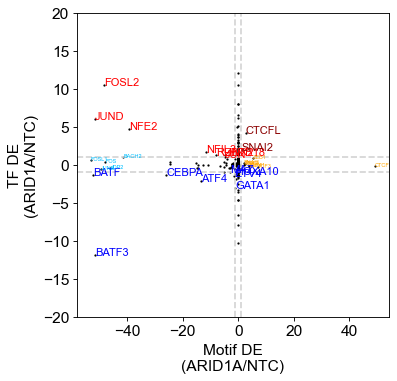

In [46]:
common=list(set(motif.index).intersection(set(single_DE.columns)))
print(len(common))

fig,plots=plt.subplots(1)
fig.set_size_inches(5,5)
plots.scatter(motif.loc[common,'signed_mlogp'],
              single_DE.loc[p,common],color='black',s=1)
plots.grid(False)
plots.set_xlabel('Motif DE\n('+p+'/NTC)')
plots.set_ylabel('TF DE\n('+p+'/NTC)')
plots.axvline(x=-1,color='lightgray',linestyle='--')
plots.axvline(x=1,color='lightgray',linestyle='--')
plots.axhline(y=-1,color='lightgray',linestyle='--')
plots.axhline(y=1,color='lightgray',linestyle='--')
plots.set_ylim(-20,20)
#plots.set_xlim(-60,60)


#add text
FDRlog=1
texts=[]
upup=[]
updown=[]
downup=[]
downdown=[]
for i, txt in enumerate(common):
    textcolor='black'
    fontsize=10
    x=motif.loc[common,'signed_mlogp'][i]
    y=single_DE.loc[p,common][i]
    if (x>=-FDRlog and x<FDRlog) and (y>=-FDRlog and y<FDRlog):
        continue
    if (x>=-FDRlog and x<FDRlog):
        continue
    if x>FDRlog:
        textcolor='orange'
    if x<-FDRlog:
        if x<-30 and (y<FDRlog and y>-FDRlog):
            textcolor='deepskyblue'
    if y>FDRlog and x<-FDRlog:
        textcolor='red'
        downup.append(txt)
    if y<-FDRlog and x<-FDRlog:
        textcolor='blue'
        downdown.append(txt)
    if x>FDRlog and y>FDRlog:
        textcolor='darkred'
        upup.append(txt)
    if y<-FDRlog and x>FDRlog:
        textcolor='gray'
        updown.append(txt)
    if textcolor not in ['red','blue','darkred']:
        fontsize=5
    if textcolor=='black':
        continue
    plots.annotate(txt, (motif.loc[common,'signed_mlogp'][i], 
                      single_DE.loc[p,common][i]),color=textcolor,
                  fontsize=fontsize)
    #texts.append(plots.text(motif.loc[common,'signed_mlogp'][i], 
    #                  single_DE.loc['ARID1A',common][i],
    #          txt))
#adjust_text(texts)
print(upup)
print(updown)
print(downup)
print(downdown)
outname='/Users/ursuo/Documents/research/baf/data/2021-06-17/share/2022-11-22/FRiP.0.2.MIN_FRAGS.1000.MIN_PEAK.0.MIN_TSS.1.SUBS.full.'+p+'motif_vs_expr.pdf'
plt.savefig(outname,transparent=True,bbox_inches='tight')

In [28]:
'CTCF' in common

False